<a href="https://colab.research.google.com/github/SantosAbimaelRomero/Project-2/blob/main/Phishing_Data_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/content/dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0.0,1.0,0.0,45.0,-1.0,0.0,1.0,1.0,4.0,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1.0,0.0,0.0,77.0,5767.0,0.0,0.0,1.0,2.0,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1.0,0.0,0.0,14.0,4004.0,5828815.0,0.0,1.0,0.0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1.0,0.0,0.0,62.0,-1.0,107721.0,0.0,0.0,3.0,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0.0,1.0,0.0,224.0,8175.0,8725.0,0.0,0.0,6.0,legitimate


# Cleaning Data

In [3]:
# Copy of Data
df1 = df.copy()

In [4]:
# Duplicates
df1.duplicated().sum()

0

In [5]:
# Missing Data
df1.isna().sum().sum()

41

In [6]:
# Incorrect data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3278 entries, 0 to 3277
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         3278 non-null   object 
 1   length_url                  3278 non-null   int64  
 2   length_hostname             3278 non-null   int64  
 3   ip                          3278 non-null   int64  
 4   nb_dots                     3278 non-null   int64  
 5   nb_hyphens                  3278 non-null   int64  
 6   nb_at                       3278 non-null   int64  
 7   nb_qm                       3278 non-null   int64  
 8   nb_and                      3278 non-null   int64  
 9   nb_or                       3278 non-null   int64  
 10  nb_eq                       3278 non-null   int64  
 11  nb_underscore               3278 non-null   int64  
 12  nb_tilde                    3278 non-null   int64  
 13  nb_percent                  3278 

In [7]:
df1['status'].value_counts()

legitimate    1645
phishing      1632
Name: status, dtype: int64

Most columns are correctly either float or int columns, the only two object columns belong to the url column and the status column.

Our target is perfectly balanced.

# Presentation

## Visuals based on Target Vector

With the following graphs, I will also address assumptions made by those that originally gathered the data against the actual data recovered, and/or assumptions made from other sources that have done similar investigations as to what can be used to identify an phishing url from a legitimate one.

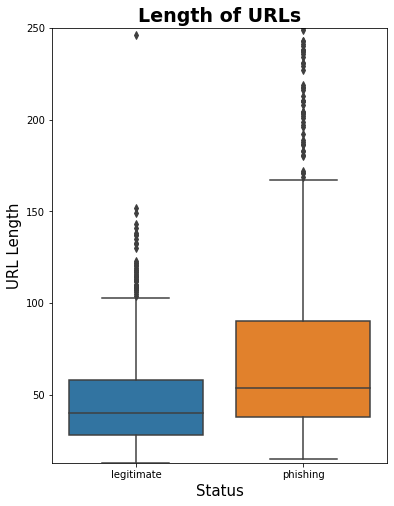

In [8]:
fig, axes = plt.subplots(nrows=1, figsize=(6, 8))

sns.boxplot(data=df1, x='status', y='length_url')
axes.set_title('Length of URLs', fontsize=19, weight='bold')
axes.set_xlabel('Status', fontsize=15)
axes.set_ylabel('URL Length', fontsize=15)
axes.set_ylim(bottom=min(df1['length_url']), top=250);

I shortened the graph, as the outliers for phising reach much higher numbers over 1,000.

Phishing urls should have longer urls.

The main difference in total length between legitimate and malicious urls lies in the outliers, but even looking closely at the IQR, malicious urls are overall longer in length than legitimate urls.

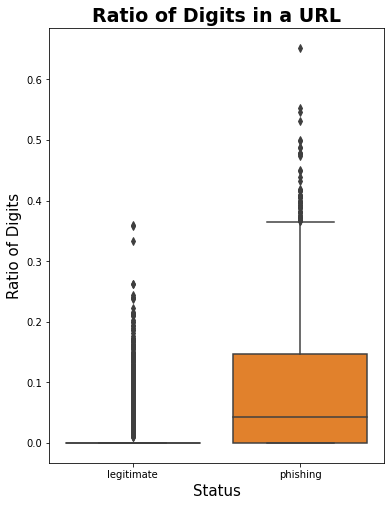

In [9]:
fig, axes = plt.subplots(nrows=1, figsize=(6, 8))

sns.boxplot(data=df1, x='status', y='ratio_digits_url')
axes.set_title('Ratio of Digits in a URL', fontsize=19, weight='bold')
axes.set_xlabel('Status', fontsize=15)
axes.set_ylabel('Ratio of Digits', fontsize=15);

The ratio of digits in a URL are typical indicators of phishing attempts, here we can see the large distiction in ratio of digits to total characters in a URL between a real and fake URL.

Phising websites have a far larger number of digits in the URL than a legitimate website would ever have, most of the overlap is in the outliers but the maximum for legitimate urls is significantly lower than the maximum for malicious urls.

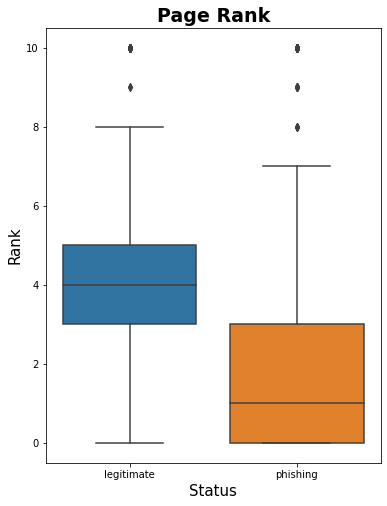

In [10]:
fig, axes = plt.subplots(nrows=1, figsize=(6, 8))

sns.boxplot(data=df1, x='status', y='page_rank')
axes.set_title('Page Rank', fontsize=19, weight='bold')
axes.set_xlabel('Status', fontsize=15)
axes.set_ylabel('Rank', fontsize=15);

Typically, phising websites are visited less than legitimate websites, so the rank should be lower.

This is clearly reflected here, legitimate urls will rank much higher than phishing urls as they are much more visited.

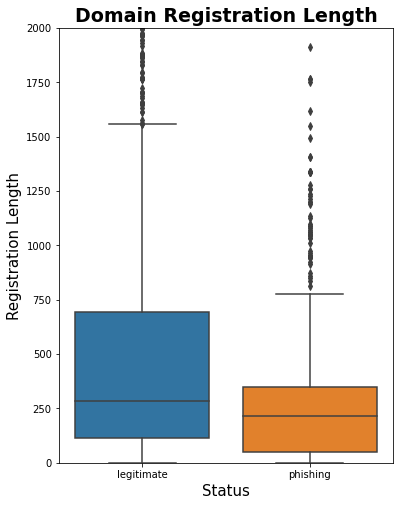

In [11]:
fig, axes = plt.subplots(nrows=1, figsize=(6, 8))

sns.boxplot(data=df1, x='status', y='domain_registration_length')
axes.set_title('Domain Registration Length', fontsize=19, weight='bold')
axes.set_xlabel('Status', fontsize=15)
axes.set_ylabel('Registration Length', fontsize=15)
axes.set_ylim(bottom=0, top=2000);

I shortened the y limit, the legitimate url outliers go for much higher, but the point is made.

Typically, since phishing websites are short lived, they won't be registered for a long time, and we can clearly see it here where legitimate websites are registered for much longer, the length is in years.

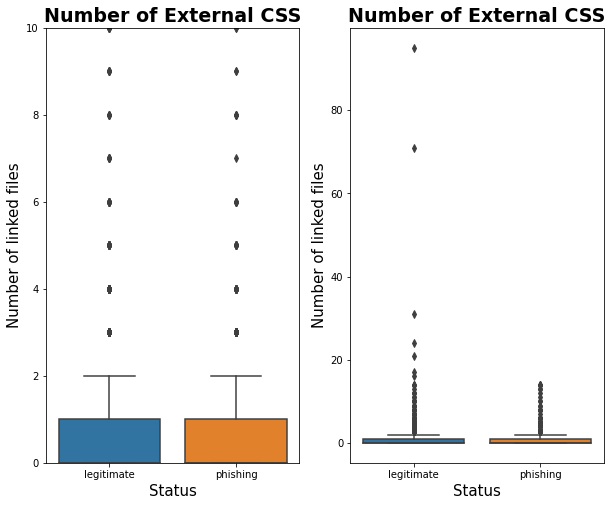

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 8))

sns.boxplot(data=df1, x='status', y='nb_extCSS', ax=axes[0])
axes[0].set_title('Number of External CSS', fontsize=19, weight='bold')
axes[0].set_xlabel('Status', fontsize=15)
axes[0].set_ylabel('Number of linked files', fontsize=15)
axes[0].set_ylim(bottom=0, top=10)

sns.boxplot(data=df1, x='status', y='nb_extCSS', ax=axes[1])
axes[1].set_title('Number of External CSS', fontsize=19, weight='bold')
axes[1].set_xlabel('Status', fontsize=15)
axes[1].set_ylabel('Number of linked files', fontsize=15);

For phishing websites, there is expected to be a small number of external CSS files, much less than legitimate websites.

The IQR and maximum are identical, the main difference lies in the outliers where legitimate urls have the potential to hit higher numbers, this metric is much harder to differentiate and the assumption doesn't seem accurate in our data.

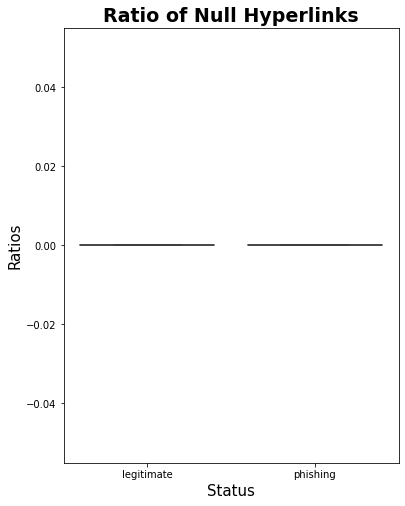

In [13]:
fig, axes = plt.subplots(nrows=1, figsize=(6, 8))

sns.boxplot(data=df1, x='status', y='ratio_nullHyperlinks')
axes.set_title('Ratio of Null Hyperlinks', fontsize=19, weight='bold')
axes.set_xlabel('Status', fontsize=15)
axes.set_ylabel('Ratios', fontsize=15);

To mimic real urls, the same number of hyperlinks that appear in phishing web pages but with empty links. So, phising urls should have more empty links.

Here we see that this theory was completely wrong in our specific data, there is not a single null hyperlink in any of our urls, authentic or malicious. This may be true in other sets of data but not for the one we are using currently.

Conclusion

Some assumptions for phishing websites were true, others not so much, but ultimately this is a solid set of data to train models in assisting this problem of accurately identifying phishing websites.

## Heatmap

In [14]:
corr = df1.corr()
corr

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
length_url,1.000000,0.234179,0.468287,0.503586,0.408293,0.168358,0.566961,0.681492,NaN,0.706878,...,0.044438,0.120490,-0.007869,0.003130,-0.008734,-0.011663,0.114268,0.032184,0.254815,-0.120885
length_hostname,0.234179,1.000000,0.268797,0.416579,0.039351,0.065351,0.203887,0.154315,NaN,0.191921,...,-0.015250,0.210971,0.069649,-0.101790,-0.040712,0.011332,0.174346,-0.029125,0.236435,-0.169581
ip,0.468287,0.268797,1.000000,0.308520,0.115529,0.054391,0.423472,0.394488,NaN,0.450071,...,0.021687,0.140497,0.017714,0.038582,-0.119546,-0.057455,0.192447,0.099581,0.270827,-0.220992
nb_dots,0.503586,0.416579,0.308520,1.000000,0.069559,0.279730,0.378849,0.496199,NaN,0.462679,...,0.038109,0.109596,0.060868,0.076008,-0.036086,-0.035126,0.090431,0.157957,0.211898,-0.118501
nb_hyphens,0.408293,0.039351,0.115529,0.069559,1.000000,0.015619,0.057786,0.147522,NaN,0.139162,...,-0.029892,-0.009215,0.026941,-0.057665,0.028293,0.079311,-0.020334,-0.033438,-0.003302,0.106022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
domain_age,-0.011663,0.011332,-0.057455,-0.035126,0.079311,-0.076718,-0.052824,-0.038442,NaN,-0.046991,...,-0.076492,-0.159995,0.070476,-0.271465,0.286372,1.000000,-0.098320,-0.051671,-0.211567,0.580269
web_traffic,0.114268,0.174346,0.192447,0.090431,-0.020334,-0.010818,0.176381,0.204100,NaN,0.227585,...,-0.037593,0.072394,0.101856,0.017371,-0.135876,-0.098320,1.000000,-0.020647,0.022904,-0.223027
dns_record,0.032184,-0.029125,0.099581,0.157957,-0.033438,0.030581,0.009132,0.069457,NaN,0.061402,...,0.021817,0.065902,0.050657,0.202812,-0.073523,-0.051671,-0.020647,1.000000,0.107926,-0.151388
google_index,0.254815,0.236435,0.270827,0.211898,-0.003302,0.116408,0.211049,0.129453,NaN,0.174203,...,0.193524,0.286102,-0.152691,0.026700,-0.144745,-0.211567,0.022904,0.107926,1.000000,-0.403954


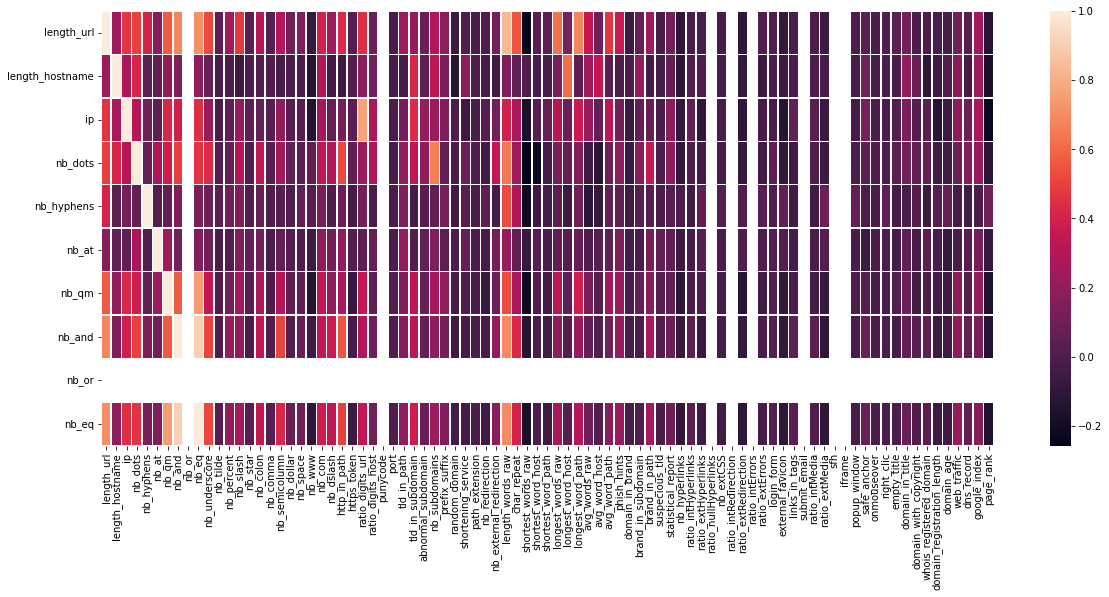

In [15]:
fig, axes = plt.subplots(figsize = (20, 8))
sns.heatmap(corr[:10], linewidth=0.5);

There are some columns that appear blank

In [51]:
corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, length_url to page_rank
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  79 non-null     float64
 1   length_hostname             79 non-null     float64
 2   ip                          79 non-null     float64
 3   nb_dots                     79 non-null     float64
 4   nb_hyphens                  79 non-null     float64
 5   nb_at                       79 non-null     float64
 6   nb_qm                       79 non-null     float64
 7   nb_and                      79 non-null     float64
 8   nb_or                       0 non-null      float64
 9   nb_eq                       79 non-null     float64
 10  nb_underscore               79 non-null     float64
 11  nb_tilde                    79 non-null     float64
 12  nb_percent                  79 non-null     float64
 13  nb_slash                  

In [60]:
# Removing Blank Columns
corr_s = corr.drop(columns=['nb_or', 'ratio_nullHyperlinks', 'ratio_intRedirection',
                           'ratio_intErrors', 'submit_email', 'sfh'])

Because I have a large amount of features, I think it best to only show any correlation that is very high or very low, all others would only clutter the heatmap.

In [61]:
# Empty Dataframe that'll hold high correlations
corr_filtered = pd.DataFrame()
# Loop to filter high correlation and append
# high correlations to the above dataframe
for i in corr_s.columns:
    for q in corr_s.index:
        if corr_s.loc[q, i] > 0.6:
            corr_filtered.loc[q, i] = corr_s.loc[q, i]
        elif corr_s.loc[q, i] < -0.6:
            corr_filtered.loc[q, i] = corr_s.loc[q, i]

Now, only high negative correlations and high positive correlations will be shown, everything else will be blank

In [63]:
# Remove Columns that only correlate with themselves
corr_filtered.dropna(how='all', axis=1, thresh=2, inplace=True)
# Remove Empty Rows
corr_filtered.dropna(thresh=1, inplace=True)
# Check Results
corr_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, length_url to links_in_tags
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   length_url           6 non-null      float64
 1   length_hostname      2 non-null      float64
 2   ip                   2 non-null      float64
 3   nb_dots              3 non-null      float64
 4   nb_qm                2 non-null      float64
 5   nb_and               4 non-null      float64
 6   nb_eq                5 non-null      float64
 7   nb_underscore        2 non-null      float64
 8   nb_slash             2 non-null      float64
 9   ratio_digits_url     2 non-null      float64
 10  ratio_digits_host    2 non-null      float64
 11  abnormal_subdomain   2 non-null      float64
 12  nb_subdomains        2 non-null      float64
 13  length_words_raw     7 non-null      float64
 14  shortest_word_host   2 non-null      float64
 15  longest_words_raw    5 non-

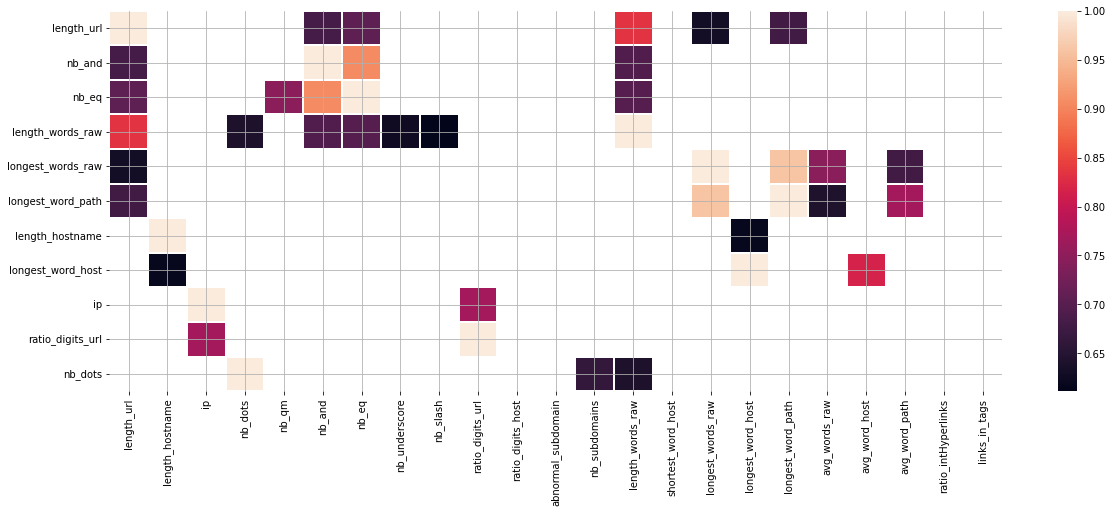

In [64]:
# Figure 1
fig, axes = plt.subplots(figsize = (20, 7))
sns.heatmap(corr_filtered[:11], linewidth=1)
plt.grid()

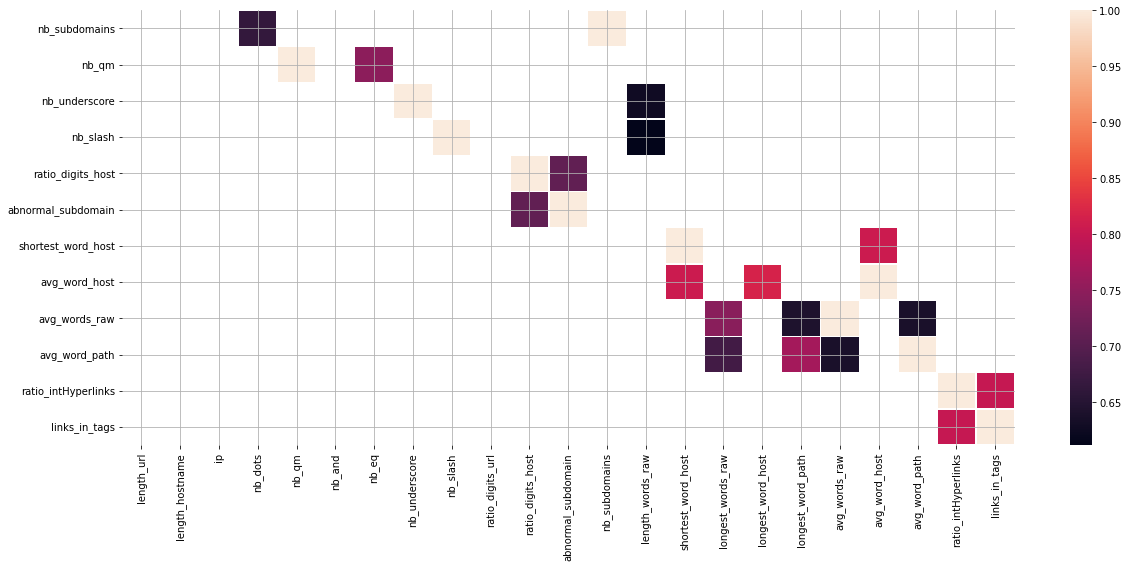

In [65]:
# Figure 2
fig, axes = plt.subplots(figsize = (20, 8))
sns.heatmap(corr_filtered[11:], linewidth=0.5)
plt.grid();

There are very few correlations in our data, out of the original 87 features, only 23 had any significant correlations. Of the correlations that were found, all are positive. I will explore these correlations in greater detail with the following visuals.

## Visuals based on Correlations in Heatmap

### URL Length Correlations

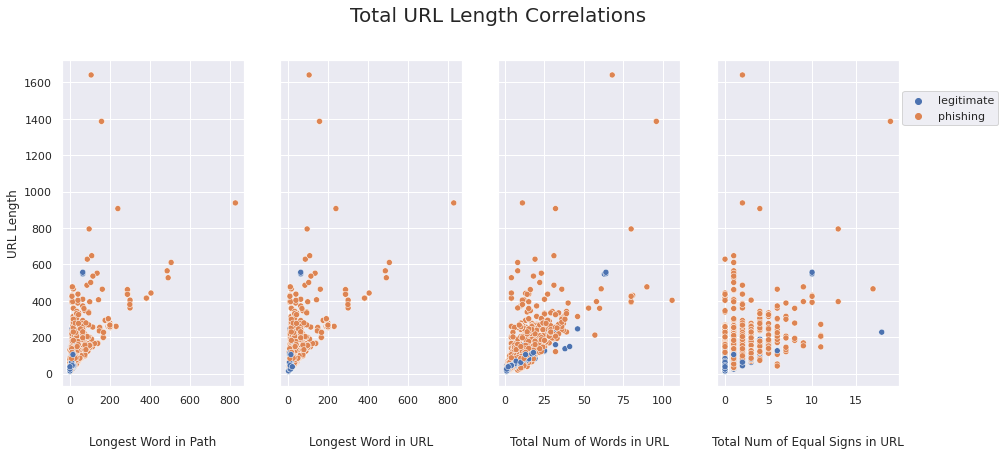

In [ ]:
fig, axes = plt.subplots(ncols = 4, figsize=(15,6), sharey=True)
sns.set(style='darkgrid')
axes[0].set_ylabel('URL Length')
plt.title('Total URL Length Correlations', x=-1.2, y=1.1, fontsize=20)

sns.scatterplot(data=df1, y = 'length_url', x='longest_word_path', hue='status', ax=axes[0])
axes[0].get_legend().remove()
axes[0].set_xlabel('Longest Word in Path', labelpad=30)

sns.scatterplot(data=df1, y = 'length_url', x='longest_words_raw', hue='status', ax=axes[1])
axes[1].get_legend().remove()
axes[1].set_xlabel('Longest Word in URL', labelpad=30)

sns.scatterplot(data=df1, y = 'length_url', x='length_words_raw', hue='status', ax=axes[2])
axes[2].get_legend().remove()
axes[2].set_xlabel('Total Num of Words in URL', labelpad=30)

sns.scatterplot(data=df1, y = 'length_url', x='nb_eq', hue='status', ax=axes[3])
axes[3].set_xlabel("Total Num of Equal Signs in URL", labelpad=30)
axes[3].legend(loc=(1.02,.8));

One of the metrics for determining if a url is real or fake is the URL length. In the boxplot we made earlier, we clearly saw a trend that the longer the URL did in fact impact whether a URL was real or fake. Now crossing this metric with others that were highly correlated with it in the heatmap we can see more clear patterns.

Most legitimate URLs, have smaller URLs, and as expected also have shorter words in the URL, shorter words in the path, have less words, and less special characters such as the equals sign ( = ).

### Hostname Correlations

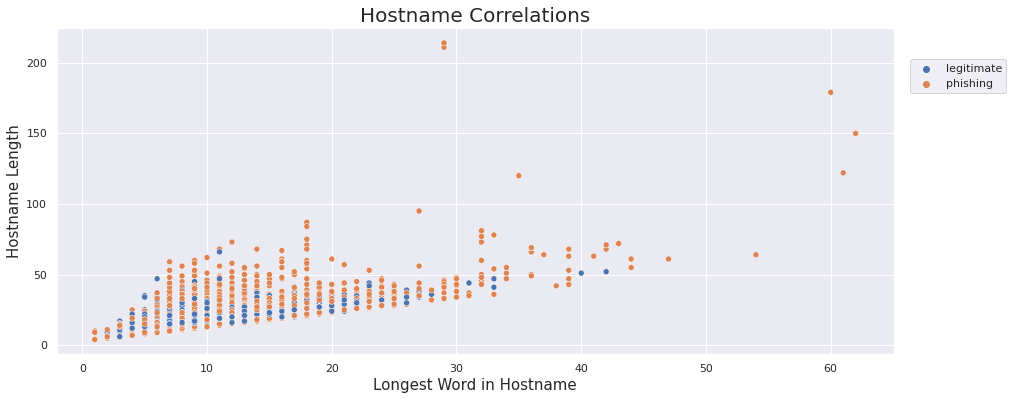

In [ ]:
fig, axes = plt.subplots(figsize=(15,6))
plt.title('Hostname Correlations', fontsize=20)

sns.scatterplot(data=df1, y = 'length_hostname', x='longest_word_host', hue='status')
axes.set_ylabel('Hostname Length', fontsize=15)
axes.set_xlabel('Longest Word in Hostname', fontsize=15)
axes.legend(loc=(1.02,.8));

Continuing with the same expectation that longer means fake and shorter means real, looking at the hostname length and hostname word length, the only clear distinction is in the extremes. The legitimate and phising URLs overlap in the bulk of our data. Once we start getting longer hostname length and word length we see the legitimate urls diminish but unlike the previous scatterplots the distinction is not as obvious until the much longer lengths.

### Special Character Correlations

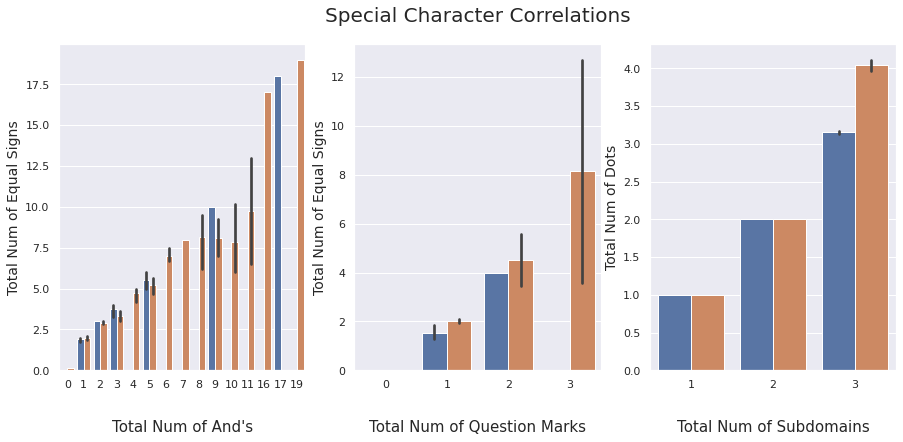

In [ ]:
fig, axes = plt.subplots(ncols = 3, figsize=(15,6))
axes[1].set_title('Special Character Correlations', y=1.05, fontsize=20)

sns.barplot(data=df1, y = 'nb_eq', x='nb_and', hue='status', ax=axes[0])
axes[0].get_legend().remove()
axes[0].set_ylabel('Total Num of Equal Signs', fontsize=14)
axes[0].set_xlabel("Total Num of And's", fontsize=15, labelpad=30)

sns.barplot(data=df1, y = 'nb_eq', x='nb_qm', hue='status', ax=axes[1])
axes[1].get_legend().remove()
axes[1].set_ylabel('Total Num of Equal Signs', fontsize=14)
axes[1].set_xlabel("Total Num of Question Marks", fontsize=15, labelpad=30)

sns.barplot(data=df1, y = 'nb_dots', x='nb_subdomains', hue='status', ax=axes[2])
axes[2].get_legend().remove()
axes[2].set_ylabel('Total Num of Dots', fontsize=14)
axes[2].set_xlabel('Total Num of Subdomains', fontsize=15, labelpad=30);

Total number of equal signs with total number of and's in a URL
___
Most notably there are some numbers where legitimate websites do not have a single count in, for example the numbers 4, 6, 7, 8, 10, 11, 16, and 19 across the x-axis all exclusively account for phising URLs and 17 uniquely only accounts for legitimate URLs. It is possible there may be a reason legitimate URLs do not use and symbols those specific number of times at all, and why phising URLs do not use And symbols 17 times specifically at all.

Total number of equal signs with total number of question marks in a URL
___
Legitimate URLs max out at 2 total questions marks while phising urls go up to 3 questions marks. Then when compared with number of equal signs, phising urls consistently have more equal signs which directly point to a longer URL which is consistent in our data to be a clear indicator of a malicious url.

Total number of dots with total number of subdomains in a URL.
___
Phising and Legitimate URLs are identical in both metrics when looking at the smaller values. The main difference appears in the max of 3 subdomains, phishing URls more frequently reach this maximum and when they do, they also have more dots in the URL.